In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
sns.set(font_scale=1.4, style='ticks')

In [14]:
df1 = pd.read_csv('f10-12.csv')
df1

,cat,recovery_rates,grid_cover,incident_cover
0,Average,0.5742,0.9761,0.5442
1,Best,0.5754,0.9754,0.5470
2,TWM,0.4672,0.9463,0.4876
3,SWM,0.4908,0.9106,0.4813


In [4]:
df2 = pd.read_csv('f13.csv')
df2

,name,cat,results
0,TWM (100),Our results,198
1,TWM (300),Our results,657
2,TWM (383),Our results,704
3,SWM (100),Our results,116
4,SWM (300),Our results,607
5,SWM (383),Our results,743
6,TWM (100),Tsai et al. (2012),177
7,TWM (300),Tsai et al. (2012),659
8,TWM (383),Tsai et al. (2012),717
9,SWM (100),Tsai et al. (2012),150


In [5]:
df3 = pd.read_csv('f7.csv')
df3.head()

,generation,adaptive values
0,1,0.131341
1,2,0.131341
2,3,0.131341
3,4,0.131604
4,5,0.136280


In [8]:
def autolabel(rects, ax, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')

def make_bar(ax, namelist, valuelist, color_list, ylab):
    rects = ax.bar(namelist, valuelist, color=color_list)
    ax.set_ylabel(ylab)
    
    autolabel(rects, ax=ax, xpos='center')

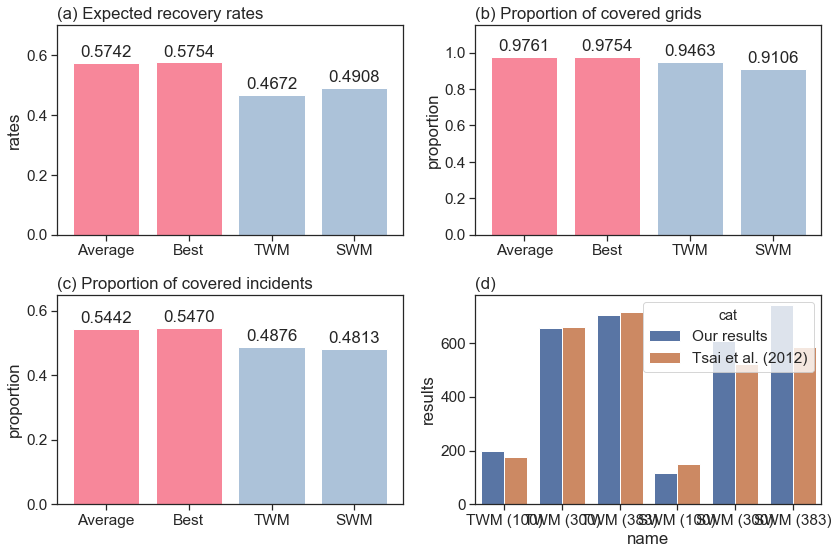

In [15]:
fig, axg = plt.subplots(2, 2, figsize=(12, 8))
axs = axg.flatten()

other = '#acc2d9'
ours = '#f7879a'
color_list = [ ours, ours, other, other ]

make_bar(axs[0], df1.cat, df1.recovery_rates, color_list, 'rates')
axs[0].set_ylim([0, 0.7])

make_bar(axs[1], df1.cat, df1.grid_cover, color_list, 'proportion')
axs[1].set_ylim([0, 1.15])

make_bar(axs[2], df1.cat, df1.incident_cover, color_list, 'proportion')
axs[2].set_ylim([0, 0.65])

sns.barplot(x='name', y='results', hue='cat', data=df2)

labs = 'abcd'
labs2 = ['Expected recovery rates', 'Proportion of covered grids', 'Proportion of covered incidents', '']
i = 0
for ax in axs:
    ax.set_title('({}) {}'.format(labs[i], labs2[i]), loc='left')
    i+=1

plt.tight_layout()

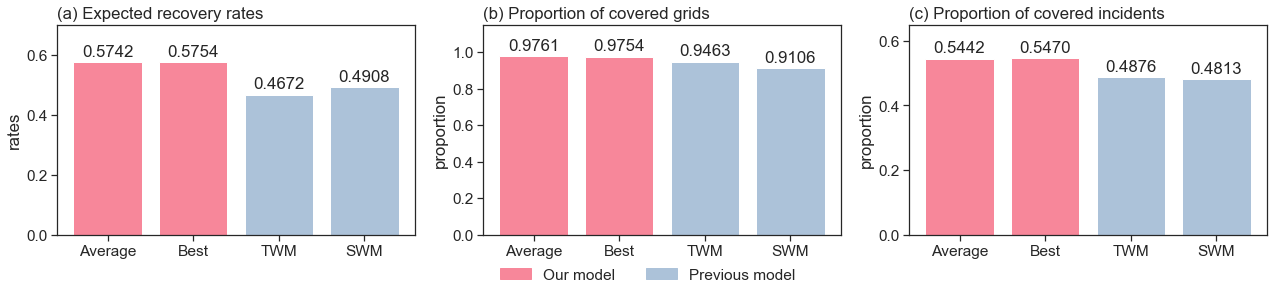

In [34]:
fig, axg = plt.subplots(1, 3, figsize=(18, 4))
axs = axg.flatten()

other = '#acc2d9'
ours = '#f7879a'
color_list = [ ours, ours, other, other ]

make_bar(axs[0], df1.cat, df1.recovery_rates, color_list, 'rates')
axs[0].set_ylim([0, 0.7])

make_bar(axs[1], df1.cat, df1.grid_cover, color_list, 'proportion')
axs[1].set_ylim([0, 1.15])

make_bar(axs[2], df1.cat, df1.incident_cover, color_list, 'proportion')
axs[2].set_ylim([0, 0.65])

labs = 'abc'
labs2 = ['Expected recovery rates', 'Proportion of covered grids', 'Proportion of covered incidents']
i = 0
for ax in axs:
    ax.set_title('({}) {}'.format(labs[i], labs2[i]), loc='left')
    i+=1

    
patch1 = mpatches.Patch(facecolor=ours,  edgecolor=ours, label='Our model')
patch2 = mpatches.Patch(facecolor=other,  edgecolor=other, label='Previous model')
handles = [patch1, patch2]
labels = ['Our model', 'Previous model']
lgd = fig.legend(handles, labels, ncol=2, loc='lower center', bbox_to_anchor=(0.5, -0.035), frameon=False)

plt.tight_layout()
plt.savefig('newFigure_11.png', dpi=150, bbox_extra_artists=(lgd,), bbox_inches='tight')


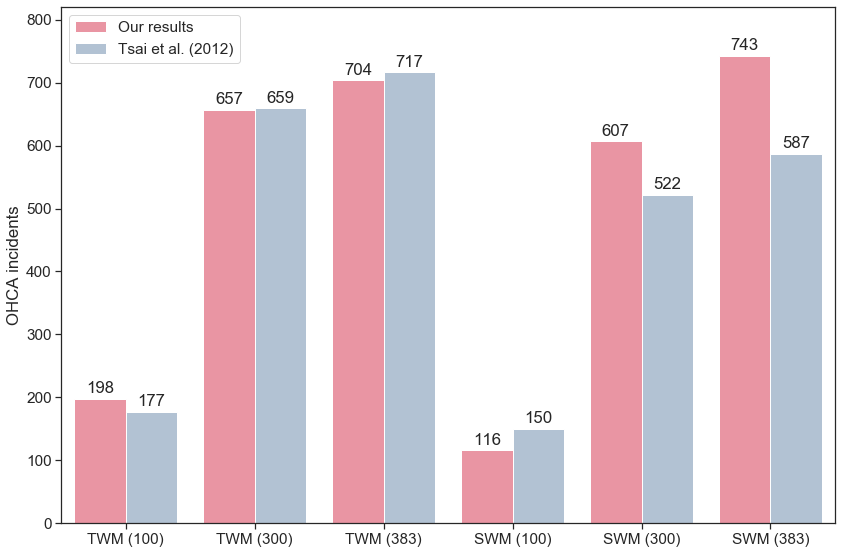

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

splot = sns.barplot(x='name', y='results', hue='cat', data=df2, ax=ax, palette=[ours, other])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


ax.set_xlabel('')
ax.set_ylabel('OHCA incidents')
ax.set_ylim([0, 820])
leg = ax.get_legend()
leg.set_title('')
#leg.set_loc('upper center')

plt.tight_layout()
plt.savefig('newFigure_14.png', dpi=150, bbox_inches='tight')

In [58]:
groupedvalues

,name,results
0,SWM (100),266
1,SWM (300),1129
2,SWM (383),1330
3,TWM (100),375
4,TWM (300),1316
5,TWM (383),1421


In [82]:
sns.set_style('ticks')

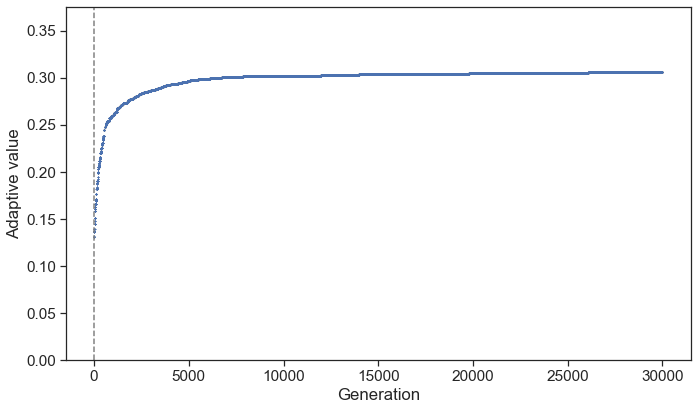

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.scatter(df3['generation'], df3['adaptive values'], s=1, marker='x')
ax.set_xlabel('Generation')
ax.set_ylabel('Adaptive value')
#ax.set_xlim([0, df3['generation'].max()])
ax.axvline(x=0, ls='--', c='grey')
ax.set_ylim([0, 0.375])
plt.tight_layout()
#plt.savefig('newFigure_08.png', dpi=150, bbox_inches='tight')